## Introduction

AirBnB has become a very convenient and popular platform for travellers to find a short-term accommodation or renters to lease.

In this article I would like to take a close look at the data from the AirBnB service in Seattle in 2016.
In the dataset there are 3818 flats listed in AirBnB with availability provided from January to December 2016.

This notebook is divided into 2 parts, which Prt 1 is data preparation inclduing data preview and data cleansing;
and Part 2 aims to answer questions from business aspect for consideration to start lodging business in Seattle.

## Index

[Part 1 Data Preparation](#Part-1-Data-Preparation)
   * [1.1 Data Preview](#1.1-Data-Preview)
   * [1.2 Data Cleansing](#1.2-Data-Cleansing)
   
[Part 2 Answer to Business Questions](#Part-2-Answer-to-Business-Questions)
   * [2.1 How is Distribution of Lodgings in Seattle?](#2.1-How-is-Distribution-of-Lodgings-in-Seattle?)
   * [2.2 How is seasonal change in listing price?](#2.2-How-is-seasonal-change-in-listing-price?)
   * [2.3 Is it easy to lease a lodging if I start a business in Seattle?](#2.3-Is-it-easy-to-lease-a-lodging-if-I-start-a-business-in-Seattle?)
   * [2.4 Is it possible to predict listing price?](#2.4-Is-it-possible-to-predict-listing-price?)

## Part 1 Data Preparation

### 1.1 Data Preview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
%matplotlib inline
from datetime import datetime


import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from IPython.display import HTML, display

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 1000)

In [3]:
#read data
listing = pd.read_csv("./data/listings.csv")
reviews = pd.read_csv("./data/reviews.csv")
calendar = pd.read_csv("./data/calendar.csv")

In [4]:
#check data
listing.sample(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
274,6400000,https://www.airbnb.com/rooms/6400000,20160104002432,2016-01-04,Cozy 1BR/1BA Apartment,This 1BR/1BA daylight basement apartment sleep...,"Wonderfully located 1 bedroom, 1 bath apartmen...",This 1BR/1BA daylight basement apartment sleep...,none,Feels like a small town community yet you are ...,NaN,"Walk to almost everything, Several buslines st...",NaN,NaN,https://a1.muscache.com/ac/pictures/87526127/8...,NaN,13566271,https://www.airbnb.com/users/show/13566271,Gene & Shannon,2014-03-26,US,NaN,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/13566271/prof...,https://a0.muscache.com/ac/users/13566271/prof...,Queen Anne,3.0,3.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Boston Street, Seattle, WA 98109, United States",Queen Anne,East Queen Anne,Queen Anne,Seattle,WA,98109,Seattle,"Seattle, WA",US,United States,47.638925,-122.356288,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$160.00,NaN,NaN,$100.00,$72.00,0,$0.00,1,180,today,t,25,55,85,155,2016-01-04,10,2015-06-13,2015-09-25,92.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.46
1094,706385,https://www.airbnb.com/rooms/706385,20160104002432,2016-01-04,"Lake Union view ""Sky Cabin"" apt.","The Sky Cabin is a stunning, bright, and beaut...","Welcome to our light and airy ""Sky Cabin"" in t...","The Sky Cabin is a stunning, bright, and beaut...",none,"Eastlake is a very quiet, hidden little neighb...","There are 15 steps up to the Sky Cabin, so sou...",Getting to and from Downtown and the Universit...,https://a0.muscache.com/ac/pictures/9695553/f5...,https://a0.muscache.com/im/pictures/9695553/f5...,https://a0.muscache.com/ac/pictures/9695553/f5...,https://a0.muscache.com/ac/pictures/9695553/f5...,2070664,https://www.airbnb.com/users/show/2070664,Gillian,2012-04-04,"Seattle, Washington, United States",I love to travel! I like to meet new people an...,within an hour,100%,100%,t,https://a2.muscache.com/ac/users/2070664/profi...,https://a2.muscache.com/ac/users/2070664/profi...,Eastlake,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Yale Terrace E, Seattle, WA 98102, United States",Eastlake,Eastlake,Cascade,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.643390,-122.325822,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,Hea...",750.0,$138.00,NaN,NaN,$300.00,$50.00,2,$0.00,2,21,5 days ago,t,21,39,69,155,2016-01-04,188,2012-10-30,2015-12-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,t,strict,f,f,2,4.85
976,2112625,https:

In [5]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [8]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### 1.2 Data Cleansing

In [11]:
# remove "$" and "," under column "price" for listing
listing['price'] = listing['price'].str.strip("$")
listing['price'] = pd.to_numeric(listing['price'].str.replace(",",""))

In [12]:
# remove "$" and "," under column "price" for calendar
calendar['price'] = calendar['price'].str.strip("$")
calendar['price'] = pd.to_numeric(calendar['price'].str.replace(",",""))

#convert available into 0,1
calendar['available'] = calendar['available'].str.replace('t','1')
calendar['available'] = calendar['available'].str.replace('f','0')
calendar['available'] = pd.to_numeric(calendar['available'])


## Part 2 Answer to Business Questions

### 2.1 How is Distribution of Lodgings in Seattle?

To study this issue we would like to illustrate the distribution of host in Seattle and the listing price per night per accomodates is shown in different colors:<br>

- Yellow: listing price < \\$30


- Orange: \\$30 $\leq$ listing price < \\$50


- Red: listing price > \\$50
    
(Due to limitation of Folim to display too many data we randomly pick 1500 data for illustration.)

In [13]:
m = folium.Map(location=[47.65,-122.3], zoom_start=11)

np.random.seed(10)
listing_samp = listing.sample(1500)
for x,y,z in zip(listing_samp['latitude'],listing_samp['longitude'],listing_samp['price']/listing_samp['accommodates'] ):
    folium.Circle(radius=10,
                  location=[x,y],
                  color = 'yellow' if z<30 else 'orange' if z<50 else 'red',
                  popup='Price: ${0}'.format(z),
                  fill=True).add_to(m)

display(m)

__Findgings__:<br>
It suggests a radical distribution centred at the Central Business District (around Belltown) where both the density of lodgings and number of top listing prices are the highest. Convenience is one of the major factors driving the lodging business, so the infrastructure of this area may explain why lodgings concentrate there － availability of terminals where main sea routes converge, grid-shape road networks and facilities for serving high populations like town hall, museums, large shopping malls and cinemas .

List of neighborhood with top ten highest number of lodgings:

In [14]:
list_top_neighbourhood = listing.groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).head(10)
list_top_neighbourhood

neighbourhood
Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Stevens                 98
Name: id, dtype: int64

__Remarks__:<br>
    (Belltown ranked the third but its area size the area is less than half of either of Capitol Hill or Ballardtop 2)

### 2.2 How is seasonal change in listing price?

In [15]:
price_change = calendar.groupby('date')['price'].mean().reset_index()

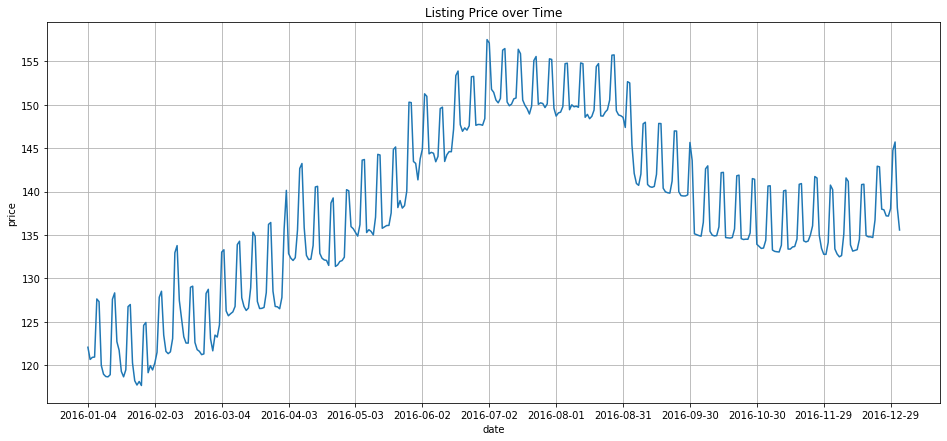

In [16]:
fig, ax = plt.subplots(figsize=(16,7));
sns.lineplot(price_change['date'],price_change['price']).set_title('Listing Price over Time')
ax.xaxis.set_major_locator(tkr.MultipleLocator(30))
ax.grid()
plt.show()


__Findings__:<br>
The graph above shows the seasonal trend infor the change of seasonal prices:<br>

    1) The average listing prices increase gradually from around $120 to $150 from January from the beginning of the year through theo summer, and the prices go downthere is rather sharp decrease after 31 Aug and maintain  and stay at a stable rangeat around $135 till the end of the year. 
    
    2) The average price by the end of the year is obviously higher than the beginning of the year. Since it is not very likely for a sharp drop of listing prices for more than 10% in the early quarter of the following  next year, it seems that there is a boom in this industry over the observed period.
    
    3) Sharp peaks reported  happening around 4-5 times a month are due to higher listing price in the weekends. 

### 2.3 Is it easy to lease a lodging if I start a business in Seattle?

In [17]:
#since we need a dataframe with info on availability and neighbourhood, here I merge neighbourhood into calendar
calendar = calendar.merge(listing[['id','neighbourhood']],left_on = 'listing_id', right_on='id')

In [18]:
#form new dataframe for the analysis
availability = calendar.groupby(['neighbourhood','listing_id'])['available'].sum()/calendar.groupby('listing_id')['available'].count()
availability = availability.reset_index()

Text(0.5, 1.0, 'Distribution of Availability of Lodging')

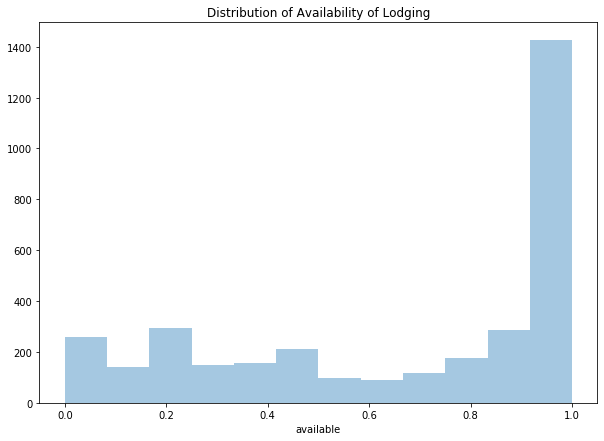

In [19]:
fig, ax = plt.subplots(figsize=(10,7));
sns.distplot(availability['available'],kde=False).set_title('Distribution of Availability of Lodging')

__Findings__:<br>
It seems not convincing to start a lodging business in Seattle since there are nearly 1,600 out of 3,818 lodges are all the time available all the time.

It seems that tThe results are notseems  convincing enough for not convincing to runa lodging business to sustain in Seattle, but is it a general phenomenon of the lodging business or if there is thereare any neighbourhood which is easier to lease?

In [20]:
#check availability by neighbourhood
top_lodging_no = calendar.groupby('neighbourhood')['listing_id'].count().sort_values(ascending=False).head(10).index

In [21]:
calendar1 = calendar[calendar['neighbourhood'].isin(top_lodging_no)]
calendar2 = calendar1.groupby(['neighbourhood','listing_id'])['available'].sum()/calendar1.groupby(['neighbourhood','listing_id'])['available'].count()
calendar2 = calendar2.reset_index()


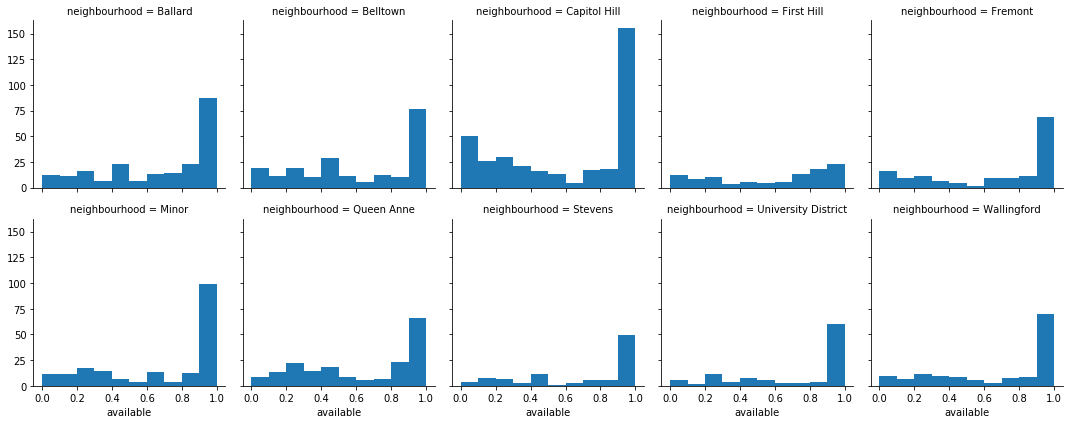

In [22]:
g = sns.FacetGrid(calendar2, col="neighbourhood",col_wrap=5)
g.map(plt.hist, "available");

__Findings__:<br>
Although the ratio of lodgings with high availability is also high, the distribution of availability in First Hill (adjacent and more inland neighbourhood of Belltown) is more even. In Capitol Hill, there is a moderately high ratio of lodgings unavailable all the time.

### 2.4 Is it possible to predict listing price?

First we look at the correlation coefficients of the continual parameters to see if there are obvious relationships among any of them:

In [23]:
#Prepare data for coefficient matrix
listing_test = listing[["host_listings_count","host_total_listings_count","accommodates",
"bathrooms","bedrooms","beds","number_of_reviews","review_scores_rating","longitude","latitude","price"]]

In [24]:
listing_test.dropna(inplace=True)

C:\Users\Nigel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
listing_test['price'].describe()

count    3153.000000
mean      126.902632
std        90.205348
min        22.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

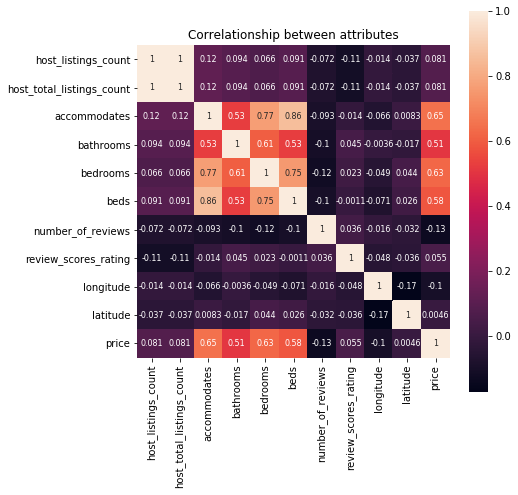

In [25]:
#Plot coefficient matrix
fig, ax = plt.subplots(figsize=(7,7));
listing_test_corr = listing_test.corr()
sns.heatmap(listing_test_corr,  annot=True,annot_kws={"size": 8} ,square = True).set_title('Correlationship between attributes');

__Findings__:<br>
1)	It makes sense that the number of guests, bathrooms, bedrooms and beds, which define the size of the flat, is mostly relevant to the change of prices.<br>
2)	It is understandable that the number of reviews may affect a flat’s popularity thus posing a slight influence on the prices.<br>
3)	It is interesting that longitude has  a greater effect on the listing prices than latitude, which can be explained by the geographical fact that Seattle is a spreading city along longitude with lodgings concentrating at the central part of the city.<br>
4)	Review score and rating is not relevant to the listing prices because the range of rating is very narrow (50% of the users give 96 marks according to the original dataset)

Finally, I tried to predict the listing prices by means of machine learning.

In [26]:
#Prepare data for prediction using supervised machine learning 
X = listing_test.drop('price',axis=1)
y = listing_test['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42) 


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

RescaledX=scaler.fit_transform(X)
#Rescaledy=scaler.transform(y)
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size = .2, random_state=42) 


In [28]:
#LinearRegression()
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print('RMSE train: %.4f' %np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test: %.4f' %np.sqrt(mean_squared_error(y_test, y_pred)))

print('R^2 train: %.4f' %r2_score(y_train, y_train_pred))
print('R^2 test: %.4f' %r2_score(y_test, y_pred))

RMSE train: 64.4248
RMSE test: 65.1412
R^2 train: 0.4759
R^2 test: 0.5281


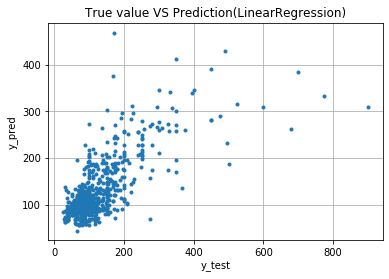

In [29]:
plt.plot(y_test, y_pred, '.')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('True value VS Prediction(LinearRegression)')
plt.grid()

In [30]:
#RandomForestRegressor
clf2 = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42,n_jobs=-1)
clf2.fit(X_train, y_train) 

y_train_pred2 = clf2.predict(X_train)
y_pred2 = clf2.predict(X_test)

print('RMSE train: %.4f' %np.sqrt(mean_squared_error(y_train, y_train_pred2)))
print('RMSE test: %.4f' %np.sqrt(mean_squared_error(y_test, y_pred2)))

print('R^2 train: %.4f' %r2_score(y_train, y_train_pred2))
print('R^2 test: %.4f' %r2_score(y_test, y_pred2))

RMSE train: 21.5256
RMSE test: 61.2714
R^2 train: 0.9415
R^2 test: 0.5825


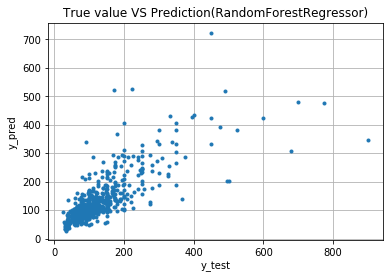

In [31]:
plt.plot(y_test, y_pred2, '.')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('True value VS Prediction(RandomForestRegressor)')
plt.grid()

In [32]:
#SVC
clf3 = SVC(kernel="rbf",gamma='auto')
clf3.fit(X_train, y_train) 
print(clf3.score(X_test, y_test))
y_train_pred3 = clf.predict(X_train)
y_pred3 = clf3.predict(X_test)

print('RMSE train: %.4f' %np.sqrt(mean_squared_error(y_train, y_train_pred3)))
print('RMSE test: %.4f' %np.sqrt(mean_squared_error(y_test, y_pred3)))

print('R^2 train: %.4f' %r2_score(y_train, y_train_pred3))
print('R^2 test: %.4f' %r2_score(y_test, y_pred3))

0.08399366085578447
RMSE train: 64.4248
RMSE test: 62.3423
R^2 train: 0.4759
R^2 test: 0.5678


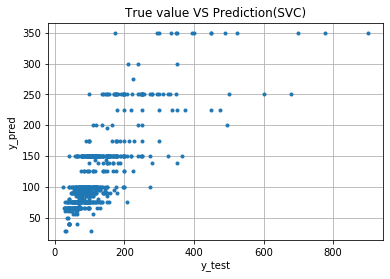

In [33]:
plt.plot(y_test, y_pred3, '.')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('True value VS Prediction(SVC)')
plt.grid()

__Findings__:<br>
It seems that the performances of the three algorithms are more or less the same (except that overfitting occurs in RandomForestRegressor but it does not significantly affect the result)